In [1]:
import scanpy as sc
import scanpy.external as sce

import anndata
from pathlib import Path
from tqdm import tqdm
import pandas as pd

/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/anndata/experimental/pytorch/_annloader.py:18: UserWarning: Сould not load pytorch.
  warnings.warn("Сould not load pytorch.")


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from upsetplot import UpSet
from upsetplot import from_contents

In [3]:
#import relation_data_lake as rdl

In [4]:
from scipy import stats

In [5]:
import scipy.sparse as sp
import anndata as ad

In [6]:
import json

import dask.dataframe as dd
import numpy as np
import pandas as pd
#import relation_data_lake as rdl
import scanpy as sc
import scipy.sparse as sp
from anndata import AnnData
#from relation_data_lake.aws.aws_api import pull_folder

In [7]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400, figsize = [1.5*6.4, 1.5*4.8])
sns.set_style("whitegrid")

In [8]:
n_jobs = 50

sc._settings.ScanpyConfig(
    n_jobs=n_jobs
)

In [9]:
import loompy as lp
import glob
import json
import zlib
import base64

from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from pyscenic.binarization import binarize


# Load data and create objects

In [10]:
adata = sc.read_h5ad('/home/jupyter-jake/SharedData/collaborations/lara-fibroblast-mouse/References/Atlas/AggregatePC24res0.5withNames-001.h5ad')


In [11]:
adata.obs.rename(columns={'CellType_0.5':'cell_type'}, inplace=True)
adata

AnnData object with n_obs × n_vars = 36847 × 18862
    obs: 'orig.ident', 'percent.mito', 'stim', 'S.Score', 'G2M.Score', 'Phase', 'res.0.5', 'cell_type', 'nCount_RNA', 'nFeature_RNA'

In [12]:
adata.obs.cell_type.unique()

['B cells', 'Fibroblasts II', 'Granulocytes', 'NK_T cells', 'Endothelial', ..., 'Schwann cells', 'Myofibroblasts', 'Fibroblasts III', 'Monocyte II', 'Epicardium']
Length: 16
Categories (16, object): ['B cells', 'DCs', 'Endothelial', 'Epicardium', ..., 'Myofibroblasts', 'NK_T cells', 'SMCs_Pericytes', 'Schwann cells']

In [13]:
adata = adata[adata.obs.cell_type.isin(['Fibroblasts III', 'Fibroblasts II', 'Fibroblasts I', 'Myofibroblasts', 'Epicardium'])]
adata

View of AnnData object with n_obs × n_vars = 18473 × 18862
    obs: 'orig.ident', 'percent.mito', 'stim', 'S.Score', 'G2M.Score', 'Phase', 'res.0.5', 'cell_type', 'nCount_RNA', 'nFeature_RNA'

In [14]:
sc.pp.filter_genes(adata, min_cells=100)
sc.pp.filter_genes(adata, min_counts=1000)
adata

/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


AnnData object with n_obs × n_vars = 18473 × 7548
    obs: 'orig.ident', 'percent.mito', 'stim', 'S.Score', 'G2M.Score', 'Phase', 'res.0.5', 'cell_type', 'nCount_RNA', 'nFeature_RNA'
    var: 'n_cells', 'n_counts'

In [31]:
adata.obs.cell_type

AAACCTGAGATACACA-1    Fibroblasts II
AAACCTGGTAATAGCA-1     Fibroblasts I
AAACCTGGTAGGACAC-1    Fibroblasts II
AAACCTGGTTCCACAA-1     Fibroblasts I
AAACCTGTCAACACCA-1     Fibroblasts I
                           ...      
TTTGTCAGTAGCCTAT-7     Fibroblasts I
TTTGTCAGTGTGGCTC-7     Fibroblasts I
TTTGTCATCGGTGTTA-7     Fibroblasts I
TTTGTCATCTAAGCCA-7     Fibroblasts I
TTTGTCATCTCGAGTA-7     Fibroblasts I
Name: cell_type, Length: 18473, dtype: category
Categories (5, object): ['Epicardium', 'Fibroblasts I', 'Fibroblasts II', 'Fibroblasts III', 'Myofibroblasts']

In [15]:
f_tfs = "/home/jupyter-jake/SharedData/collaborations/pyscenic/mouse/allTFs_mm.txt" 
f_loom_path_scenic = '/home/jupyter-jake/SharedData/collaborations/lara-fibroblast-mouse/References/Atlas/Mouse_Forte.loom'

f_db_glob = "/home/jupyter-jake/SharedData/collaborations/pyscenic/mouse/*feather"
f_db_names = ' '.join( glob.glob(f_db_glob) )

# motif databases
f_motif_path = "/home/jupyter-jake/SharedData/collaborations/pyscenic/mouse/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl"

f_pyscenic_output = "pyscenic_output_Forte.loom"

In [16]:
rewrwer

NameError: name 'rewrwer' is not defined

In [17]:
# create basic row and column attributes for the loom file:
row_attrs = {
    "Gene": np.array(adata.var_names) ,
}
col_attrs = {
    "CellID": np.array(adata.obs_names) ,
    "nGene": np.array( np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,
    "nUMI": np.array( np.sum(adata.X.transpose() , axis=0)).flatten() ,
}
lp.create( f_loom_path_scenic, adata.X.transpose(), row_attrs, col_attrs)

In [20]:
rwerwerw

NameError: name 'rwerwerw' is not defined

In [22]:
!pyscenic grn {f_loom_path_scenic} {f_tfs} -o adj_Forte.csv --num_workers 20


2023-07-18 17:08:13,460 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2023-07-18 17:08:15,557 - pyscenic.cli.pyscenic - INFO - Inferring regulatory networks.
/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44577 instead
  warnings.warn(
preparing dask client
parsing input
creating dask graph
20 partitions
computing dask graph
/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/distributed/client.py:3108: UserWarning: Sending large graph of size 136.84 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
not shutting down client, client was created externally
finished

2023-07-18 19:05:00,677 - pyscenic.cli.pyscenic - INFO - Writing results to file.


In [23]:
!pyscenic ctx adj_Forte.csv \
    {f_db_names} \
    --annotations_fname {f_motif_path} \
    --expression_mtx_fname {f_loom_path_scenic} \
    --output reg_Forte.csv \
    --mask_dropouts \
    --num_workers 20


2023-07-19 12:33:20,824 - pyscenic.cli.pyscenic - INFO - Creating modules.

2023-07-19 12:33:21,411 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2023-07-19 12:33:33,633 - pyscenic.utils - INFO - Calculating Pearson correlations.

2023-07-19 12:33:33,860 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [True].

2023-07-19 12:33:42,978 - pyscenic.utils - INFO - Creating modules.

2023-07-19 12:34:38,102 - pyscenic.cli.pyscenic - IN

In [24]:
!pyscenic aucell \
    {f_loom_path_scenic} \
    reg_Forte.csv \
    --output {f_pyscenic_output} \
    --num_workers 20


2023-07-19 13:19:11,125 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2023-07-19 13:19:12,913 - pyscenic.cli.pyscenic - INFO - Loading gene signatures.
Create regulons from a dataframe of enriched features.
Additional columns saved: []

2023-07-19 13:19:14,544 - pyscenic.cli.pyscenic - INFO - Calculating cellular enrichment.

2023-07-19 13:19:25,386 - pyscenic.cli.pyscenic - INFO - Writing results to file.
/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/pyscenic/cli/utils.py:347: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, threshold in auc_thresholds.iteritems()


In [ ]:
gfhgfhg

In [25]:
# scenic output
lf = lp.connect( f_pyscenic_output, mode='r', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

In [26]:
auc_mtx

,Ahdc1(+),Arid5a(+),Arid5b(+),Arntl(+),Atf2(+),Atf3(+),Atf4(+),Atf5(+),Atf6b(+),Bach1(+),...,Zfp560(+),Zfp580(+),Zfp62(+),Zfp639(+),Zfp646(+),Zfp704(+),Zfp740(+),Zfp768(+),Zfp942(+),Zfx(+)
AAACCTGAGATACACA-1,0.000000,0.00000,0.022993,0.016410,0.0,0.033887,0.037468,0.000000,0.009019,0.003872,...,0.008863,0.012071,0.02069,0.005446,0.000000,0.008495,0.005143,0.0,0.0,0.000000
AAACCTGGTAATAGCA-1,0.026091,0.00000,0.015955,0.003012,0.0,0.071380,0.046142,0.011273,0.005055,0.006196,...,0.000000,0.011580,0.00000,0.010663,0.000000,0.007023,0.000000,0.0,0.0,0.006463
AAACCTGGTAGGACAC-1,0.008006,0.00000,0.023347,0.027964,0.0,0.040555,0.038659,0.120027,0.004084,0.004531,...,0.000562,0.012036,0.00000,0.004954,0.000000,0.011963,0.004321,0.0,0.0,0.000000
AAACCTGGTTCCACAA-1,0.000000,0.00000,0.015245,0.007553,0.0,0.022032,0.034878,0.055703,0.008648,0.010203,...,0.000000,0.009780,0.00000,0.011348,0.000000,0.008205,0.004645,0.0,0.0,0.003665
AAACCTGTCAACACCA-1,0.002653,0.00000,0.014668,0.024637,0.0,0.032657,0.038603,0.000000,0.001682,0.007261,...,0.001092,0.009886,0.00000,0.001599,0.000000,0.007281,0.001407,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGCCTAT-7,0.001543,0.00000,0.022704,0.015016,0.0,0.082392,0.045113,0.016578,0.005225,0.005131,...,0.000000,0.015389,0.00000,0.005393,0.000000,0.009912,0.012814,0.0,0.0,0.007089
TTTGTCAGTGTGGCTC-7,0.006559,0.00422,0.019736,0.037720,0.0,0.044087,0.035402,0.061671,0.015254,0.008384,...,0.000000,0.014104,0.00000,0.002635,0.016294,0.011727,0.004110,0.0,0.0,0.004083
TTTGTCATCGGTGTTA-7,0.000916,0.00000,0.014707,0.018882,0.0,0.053430,0.035762,0.014589,0.003774,0.000000,...,0.004931,0.009745,0.00000,0.004936,0.000000,0.009461,0.001407,0.0,0.0,0.000000
TTTGTCATCTAAGCCA-7,0.004196,0.00000,0.018200,0.034123,0.0,0.050212,0.034618,0.000000,0.005435,0.003137,...,0.003089,0.013508,0.00000,0.000703,0.000000,0.008043,0.003250,0.0,0.0,0.001640


In [ ]:
asdasdsa

/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


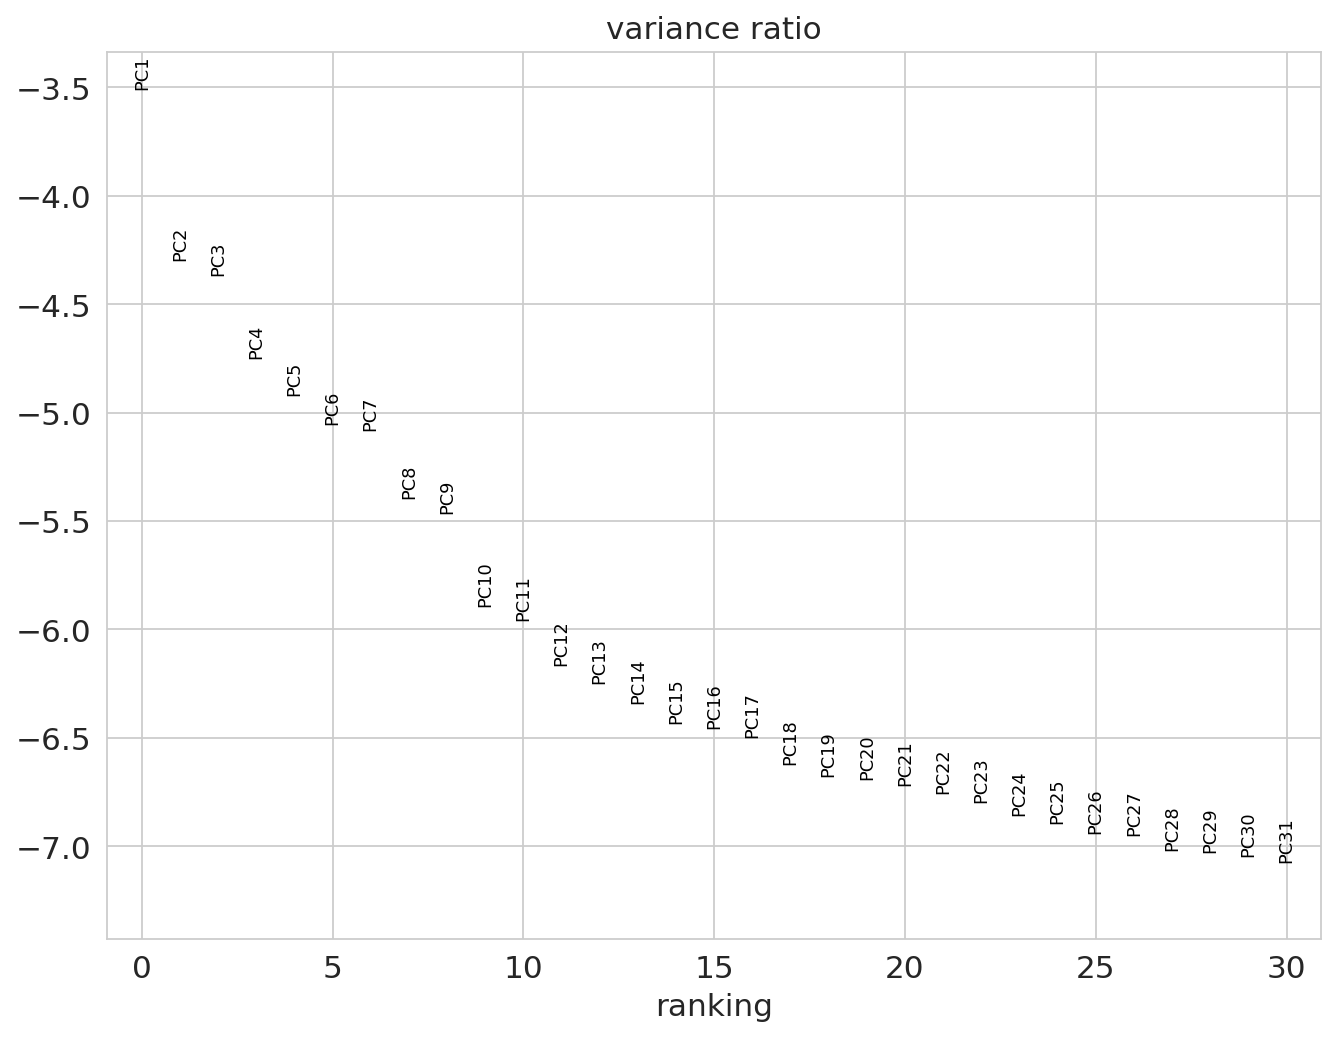

In [35]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, log=True)

In [36]:
sc.pp.neighbors(adata, n_pcs = 9) 
sc.tl.umap(adata)

/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
adata

AnnData object with n_obs × n_vars = 18473 × 7548
    obs: 'orig.ident', 'percent.mito', 'stim', 'S.Score', 'G2M.Score', 'Phase', 'res.0.5', 'cell_type', 'nCount_RNA', 'nFeature_RNA'
    var: 'n_cells', 'n_counts'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


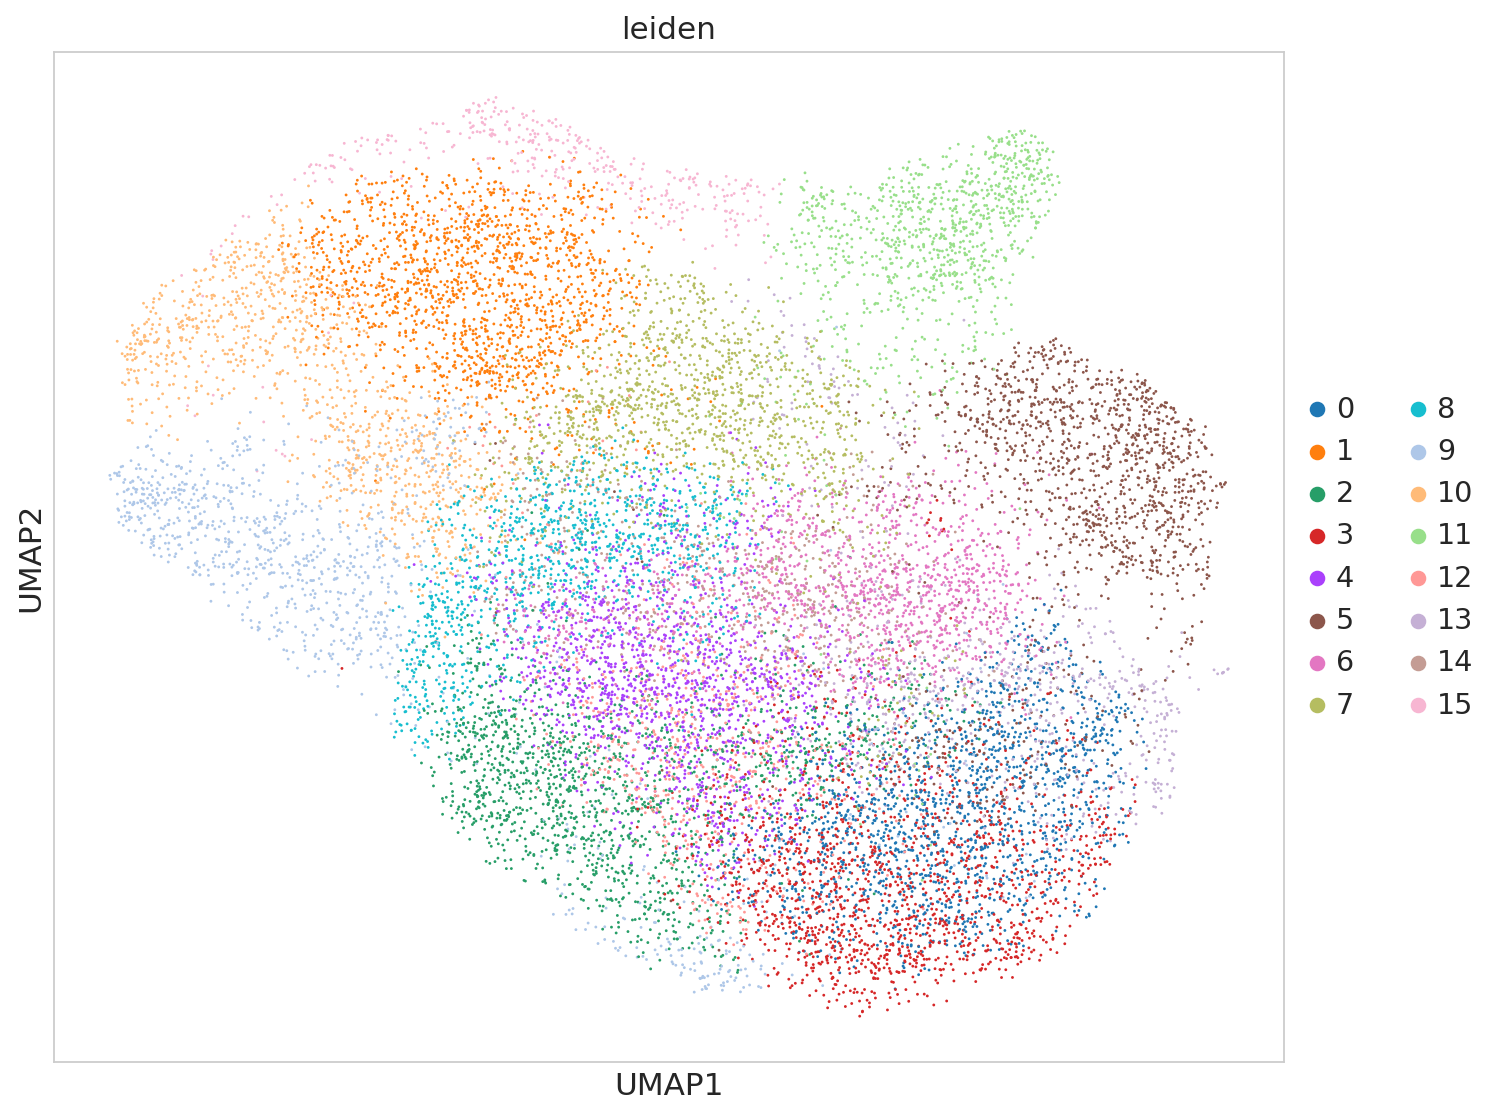

In [41]:
sc.tl.leiden(adata, resolution=1)
sc.pl.umap(adata, color = ['leiden'])

In [49]:
sc.tl.rank_genes_groups(adata, 'leiden')

In [48]:
annot_Forte = pd.read_csv('CellReports_ForteMarkers.csv')
subclust_markers = {c_g: set(g_i.to_list()) for c_g, g_i in annot_Forte.groupby('CellType')['Gene']}

In [50]:
marker_matches = sc.tl.marker_gene_overlap(adata, subclust_markers)
clus2cellty = {cl:ct for cl,ct in zip(
    marker_matches.columns, 
    marker_matches.index.values[np.argmax(marker_matches.values, axis=0)])
}
adata.obs['cell_type_subclust'] = adata.obs.leiden.replace(clus2cellty)
adata

AnnData object with n_obs × n_vars = 18473 × 7548
    obs: 'orig.ident', 'percent.mito', 'stim', 'S.Score', 'G2M.Score', 'Phase', 'res.0.5', 'cell_type', 'nCount_RNA', 'nFeature_RNA', 'leiden', 'cell_type_subclust'
    var: 'n_cells', 'n_counts'
    uns: 'pca', 'neighbors', 'umap', 'stim_colors', 'orig.ident_colors', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [51]:
rss_cellType = regulon_specificity_scores( auc_mtx, adata.obs.cell_type_subclust )
rss_cellType

,Ahdc1(+),Arid5a(+),Arid5b(+),Arntl(+),Atf2(+),Atf3(+),Atf4(+),Atf5(+),Atf6b(+),Bach1(+),...,Zfp560(+),Zfp580(+),Zfp62(+),Zfp639(+),Zfp646(+),Zfp704(+),Zfp740(+),Zfp768(+),Zfp942(+),Zfx(+)
EndD,0.251617,0.209226,0.319712,0.280626,0.212035,0.298253,0.313419,0.237471,0.319092,0.301596,...,0.299528,0.316931,0.212126,0.299516,0.214717,0.317532,0.313937,0.204623,0.176059,0.286081
PLS,0.322615,0.218788,0.348885,0.342598,0.223220,0.337146,0.348766,0.248069,0.344232,0.366353,...,0.321514,0.345822,0.237352,0.351977,0.234672,0.353285,0.350433,0.209819,0.187492,0.329102
IR,0.271443,0.220773,0.344192,0.306557,0.214285,0.403828,0.379152,0.336917,0.364888,0.348407,...,0.337495,0.375608,0.218218,0.343297,0.234654,0.372615,0.353649,0.206446,0.182889,0.318265
LR,0.255635,0.190162,0.292072,0.324827,0.183924,0.309862,0.292586,0.225819,0.274283,0.282715,...,0.263025,0.281499,0.206140,0.279810,0.194744,0.285794,0.276239,0.184499,0.172032,0.249567
Phagoc,0.261898,0.222218,0.247849,0.252586,0.230109,0.244654,0.251173,0.234656,0.265422,0.260788,...,0.269412,0.259475,0.212810,0.258759,0.225979,0.255767,0.260207,0.209748,0.189951,0.273484
Myofb,0.236833,0.186711,0.275752,0.272062,0.185767,0.258444,0.271631,0.187735,0.262386,0.238255,...,0.235446,0.272489,0.183170,0.263543,0.188683,0.260292,0.253088,0.199811,0.174932,0.214994
MFC,0.220736,0.177803,0.273325,0.279525,0.175188,0.236719,0.245194,0.185026,0.231926,0.237582,...,0.223929,0.237064,0.186368,0.230825,0.182496,0.243838,0.237651,0.174379,0.171313,0.213406
Prolif Myofb,0.194934,0.172019,0.218982,0.223644,0.169709,0.222277,0.231036,0.181826,0.215967,0.206282,...,0.201642,0.226472,0.170206,0.206349,0.168798,0.226957,0.213674,0.174006,0.178852,0.177995


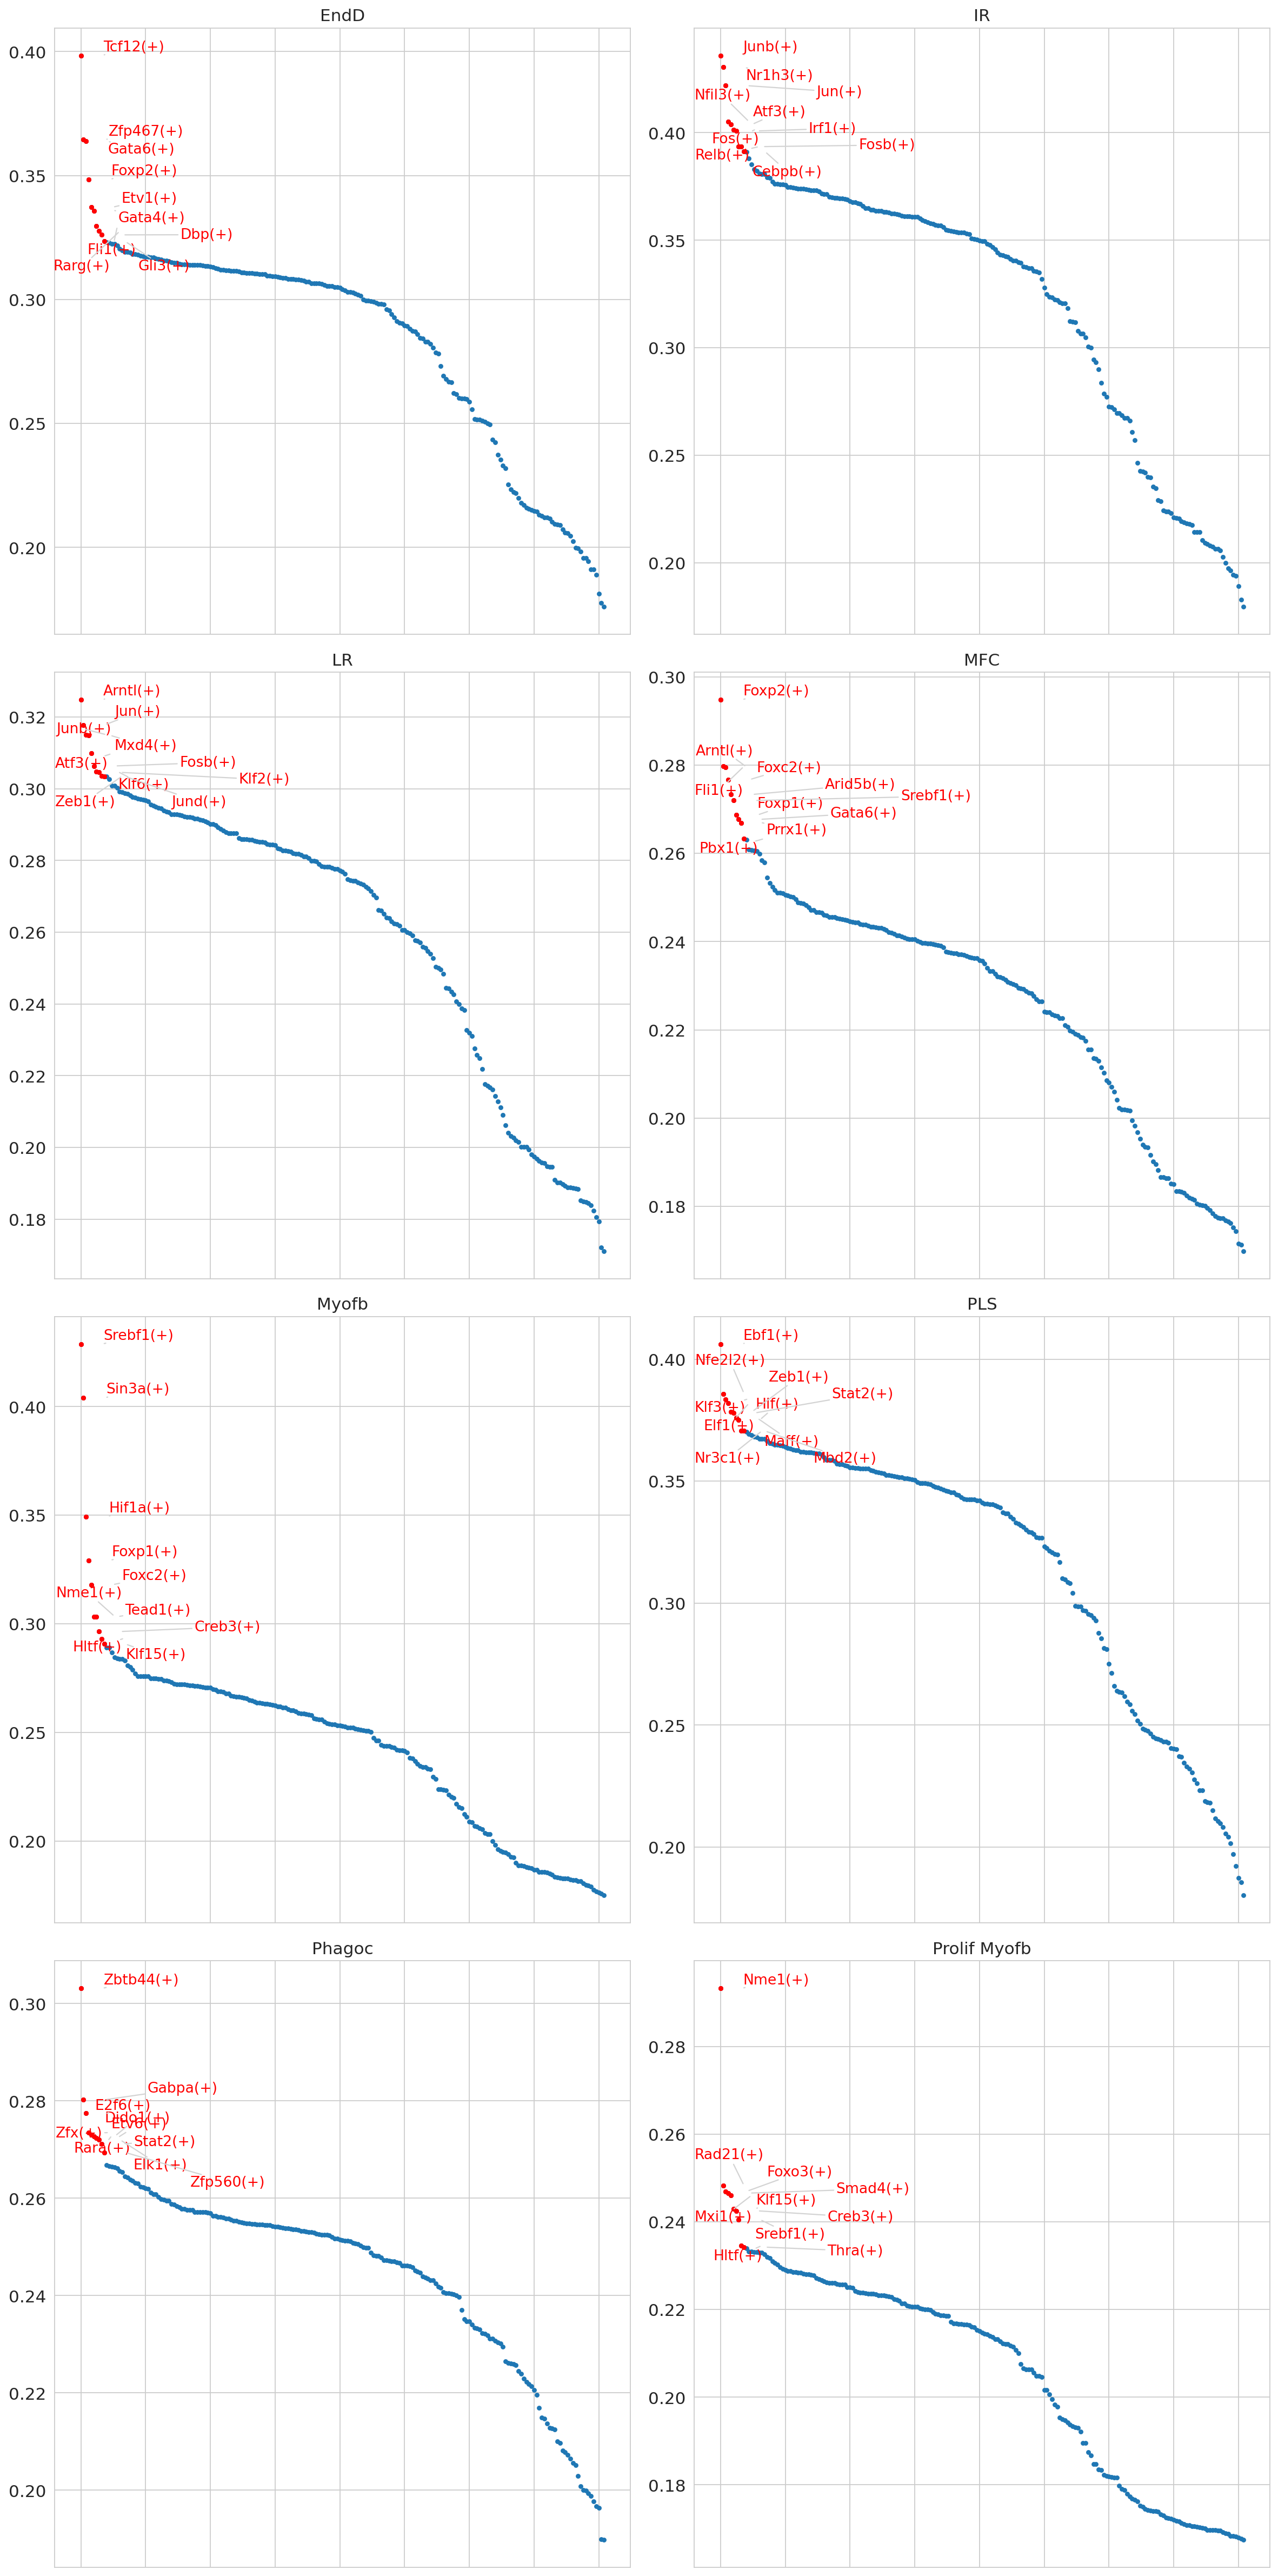

In [56]:
cats = sorted(list(set(adata.obs.cell_type_subclust )))

fig = plt.figure(figsize=(15, 30))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(4,2,num)
    plot_rss(rss_cellType, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
#fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
#fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({'figure.autolayout': True, 'figure.titlesize': 'medium' ,'axes.labelsize': 'medium','axes.titlesize':'medium','xtick.labelsize':'medium','ytick.labelsize':'medium'})
plt.savefig("figures/Forte-RSS-top10.pdf", dpi=600, bbox_inches = "tight")
plt.savefig("figures/Forte-RSS-top10.png", dpi=600, bbox_inches = "tight")
plt.savefig("figures/Forte-RSS-top10.svg", dpi=600, bbox_inches = "tight")

plt.show()

In [ ]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

In [ ]:
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

In [ ]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              #cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [ ]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in adata.obs.cell_type ]

In [ ]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("PBMC10k_cellType-heatmap-legend-top5.pdf", dpi=600, bbox_inches = "tight")

In [ ]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("PBMC10k_cellType-heatmap-top5.pdf", dpi=600, bbox_inches = "tight")